## Estadística Aplicada

Sesión 13 - 29 septiembre

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

In [1]:
##librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

plt.rcParams['figure.figsize'] = (10,6)

In [4]:
## datos
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates= True)
pasajeros.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


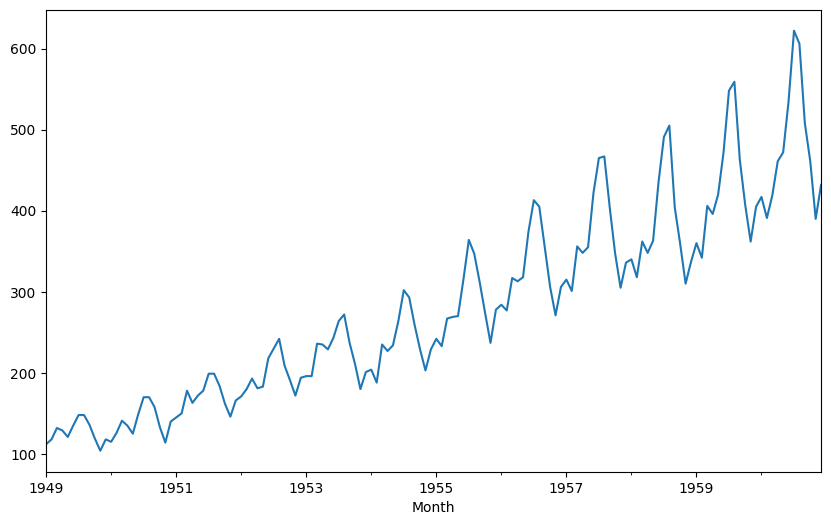

In [7]:
pasajeros['Thousands of Passengers'].plot();

In [11]:
#promedio movil simlpe a 12 meses
pasajeros['PMS-12'] = pasajeros['Thousands of Passengers'].rolling(12).mean()

In [12]:

pasajeros.head(13)

,Thousands of Passengers,PMS-12
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


In [13]:
pasajeros['PMC-11'] = pasajeros['Thousands of Passengers'].rolling(11, center = True).mean()

In [14]:
pasajeros.head(13)

,Thousands of Passengers,PMS-12,PMC-11
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,127.454545
1949-07-01,148,NaN,128.000000
1949-08-01,148,NaN,127.727273
1949-09-01,136,NaN,127.181818


<Axes: xlabel='Month'>

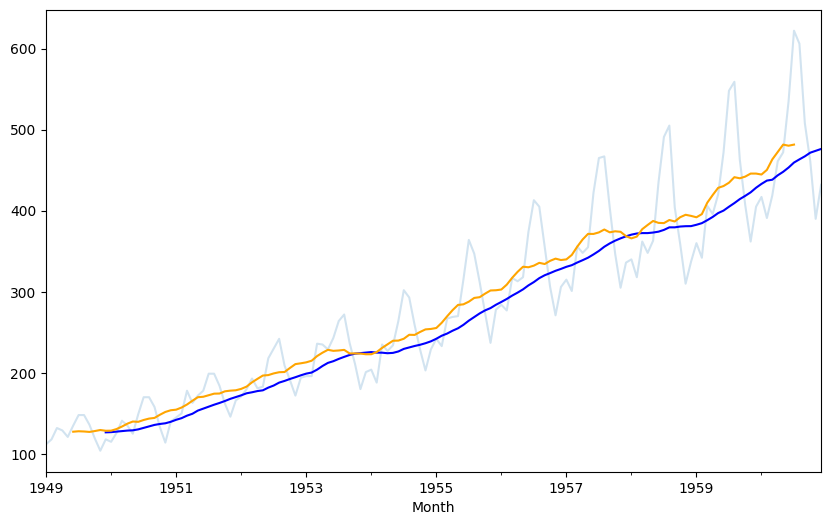

In [17]:
pasajeros['Thousands of Passengers'].plot(alpha = 0.2)
pasajeros['PMS-12'].plot(color = 'blue')
pasajeros['PMC-11'].plot(color = 'orange')

In [18]:
import yfinance as yf

In [19]:
amazon = yf.download('AMZN',
                     start = '2016-01-01',
                     end = '2022-12-31',
                     progress = False)

In [20]:
amazon.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,32.814499,32.886002,31.375500,31.849501,31.849501,186290000
2016-01-05,32.342999,32.345501,31.382500,31.689501,31.689501,116452000
2016-01-06,31.100000,31.989500,31.015499,31.632500,31.632500,106584000
2016-01-07,31.090000,31.500000,30.260500,30.396999,30.396999,141498000
2016-01-08,30.983000,31.207001,30.299999,30.352501,30.352501,110258000


In [21]:
amazon = amazon[['Adj Close']]
amazon.head(5)

,Adj Close
Date,
2016-01-04,31.849501
2016-01-05,31.689501
2016-01-06,31.632500
2016-01-07,30.396999
2016-01-08,30.352501


In [22]:
##señal corto plazo
amazon['PMS-10'] = amazon['Adj Close'].rolling(10).mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9660\2189650398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['PMS-10'] = amazon['Adj Close'].rolling(10).mean()


In [23]:
##señal largo plazo
amazon['PMS-50'] = amazon['Adj Close'].rolling(50).mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9660\1240975484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['PMS-50'] = amazon['Adj Close'].rolling(50).mean()


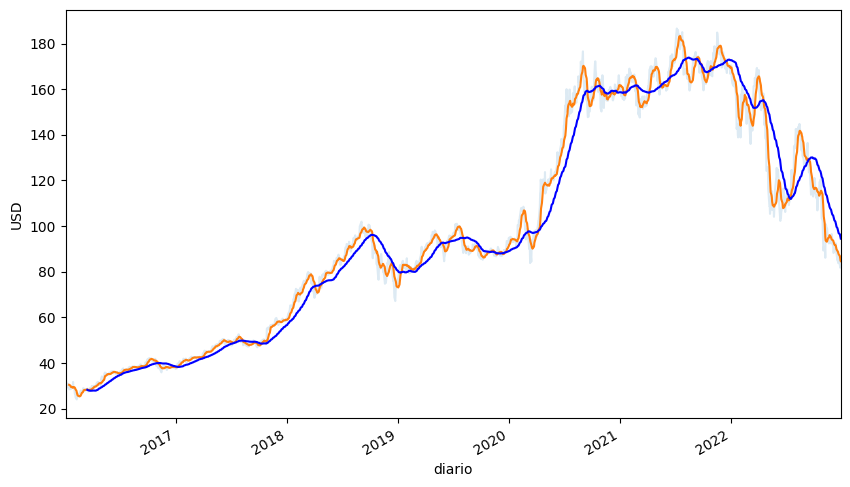

In [29]:
amazon['Adj Close'].plot(alpha = 0.15)
amazon['PMS-10'].plot()
amazon['PMS-50'].plot(color ='blue')
plt.ylabel('USD')
plt.xlabel('diario')
plt.xlim('2016-01-04', '2022-12-30');

retorno 

$\frac{P_t - P_{t-1}}{P_{t-1}} $

In [30]:
amazon['retorno'] = amazon['Adj Close'].pct_change()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9660\4286046242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['retorno'] = amazon['Adj Close'].pct_change()


In [31]:
amazon.head(5)

,Adj Close,PMS-10,PMS-50,retorno
Date,,,,
2016-01-04,31.849501,NaN,NaN,NaN
2016-01-05,31.689501,NaN,NaN,-0.005024
2016-01-06,31.632500,NaN,NaN,-0.001799
2016-01-07,30.396999,NaN,NaN,-0.039058
2016-01-08,30.352501,NaN,NaN,-0.001464


<Axes: xlabel='Date'>

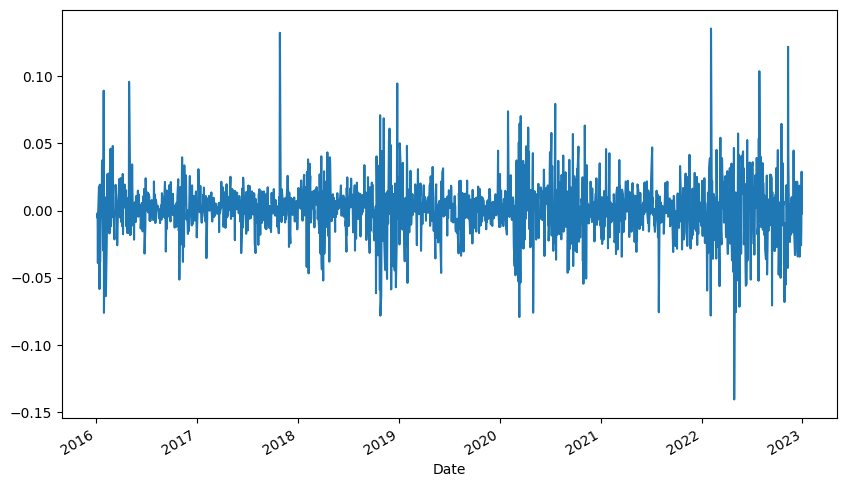

In [32]:
amazon['retorno'].plot()